In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df[121:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
127,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
128,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
129,5,6,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire


In [4]:
df.drop([122,123,124], inplace = True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [5]:
df[121:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
125,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
126,5,6,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire
127,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire
128,7,6,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6,fire
129,8,6,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire


In [6]:
# we adding a new column Region to dataset
# rows 1 = Bejaia Region and 0 = Sidi Bel-abbes Region
df['Region'] = 1
for i in range(len(df)):
    if i >= 122:
        df['Region'][i] = 0

C:\Users\Thanmai\AppData\Local\Temp/ipykernel_21028/3918257608.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Region'][i] = 0


In [7]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0


1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


In [9]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [10]:
df.columns = [co.strip() for co in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [11]:
#let's check for missing values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

We can see that there is a missing value in classes column

In [12]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

see the classes it contains some extra spaces so we have to remove it

In [13]:
df['Classes'] = df['Classes'].str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [14]:
df['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [15]:
df.iloc[165]

day                 14
month                7
year              2012
Temperature         37
RH                  37
Ws                  18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
Region               0
Name: 165, dtype: object

In [16]:
df.at[165,'DC'] = 14.6
df.at[165,'ISI'] = 9
df.at[165,'BUI'] = 12.5
df.at[165,'FWI'] = 10.4
df.at[165,'Classes'] = 'fire'

In [17]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [18]:
#Changing Datatypes
df=df.astype({'day':'int', 'month':'int', 'year':'int', 'Temperature':'int', 'RH':'int', 'Ws':'int', 'Rain':'float', 'FFMC':'float','DMC':'float', 'DC':'float','ISI':'float', 'BUI':'float', 'FWI':'float',})

In [19]:
# Statistical summary of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288115,47.619662,6.9,13.275,33.10,68.150,220.4


In [20]:
# Printing all the categorical columns
categorical_col = [fea for fea in df.columns if df[fea].dtype == 'O']
categorical_col

['Classes']

In [21]:
# Printing all the numerical columns
numerical_col = [fea for fea in df.columns if df[fea].dtype != 'O']
numerical_col

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Region']

# Univariate Analysis:
The term univariate analysis refers to the analysis of one variable. You can remember this because the prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable. These plots help in understanding the location/position of observations in the data variable, its distribution, and dispersion. Uni-variate plots are of two types: 
1) Enumerative plots 

2) Summary plots

# 1) Univariate enumerative Plots :

These plots enumerate/show every observation in data and provide information about the distribution of the observations on a single data variable. We now look at different enumerative plots.

## Scatter Plot: 
This plots different observations/values of the same variable corresponding to the index/observation number. Use the plt.scatter() function of matplotlib to plot a univariate scatter diagram. The scatter() function requires two parameters to plot. So, in this example, we plot the variable ‘math score’ against the corresponding observation number that is stored as the index of the data frame (df.index).And we are considering the gender to make the plot more meaningful.

In seaborn, the hue parameter determines which column in the data frame should be used for color encoding. This helps to differentiate between the data values according to the categories they belong to. The hue parameter takes the grouping variable as it’s input using which it will produce points with different colors.

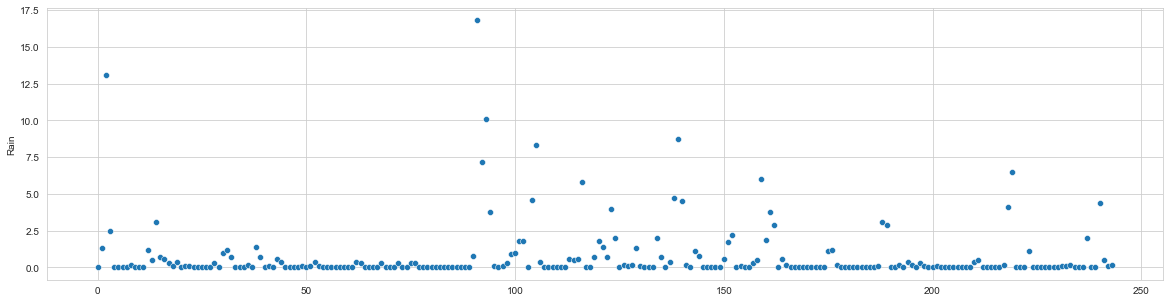

In [22]:
#Scatter Plot
sns.set_style('whitegrid')
plt.figure(figsize=(20,5))
sns.scatterplot(x=df.index,y=df['Rain'],data=df)
plt.show()

## Line Plot: 
A line plot visualizes data by connecting the data points via line segments. It is similar to a scatter plot except that the measurement points are ordered (typically by their x-axis value) and joined with straight line segments.

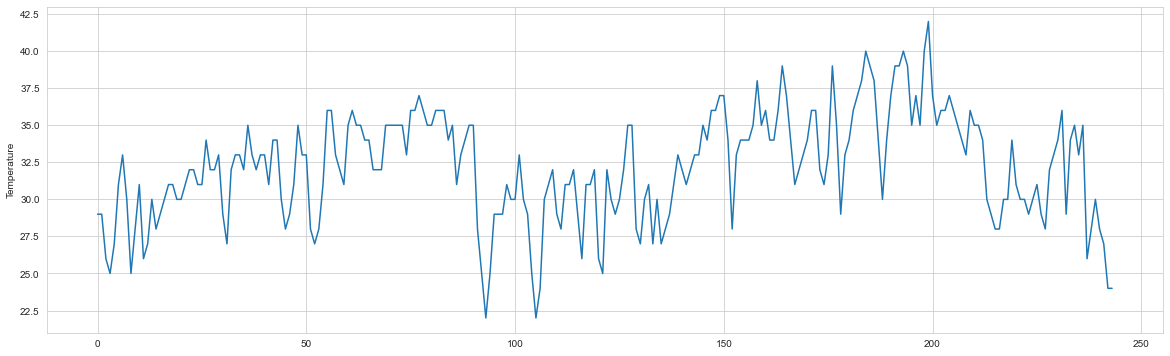

In [23]:
#Line Plot
plt.figure(figsize=(20,6))
fig=sns.lineplot(x=df.index,y=df['Temperature'],data=df)
plt.show()

## Strip Plot: 
The strip plot is similar to a scatter plot. It is often used along with other kinds of plots for better analysis. It is used to visualize the distribution of data points of the variable.

<AxesSubplot:ylabel='FFMC'>

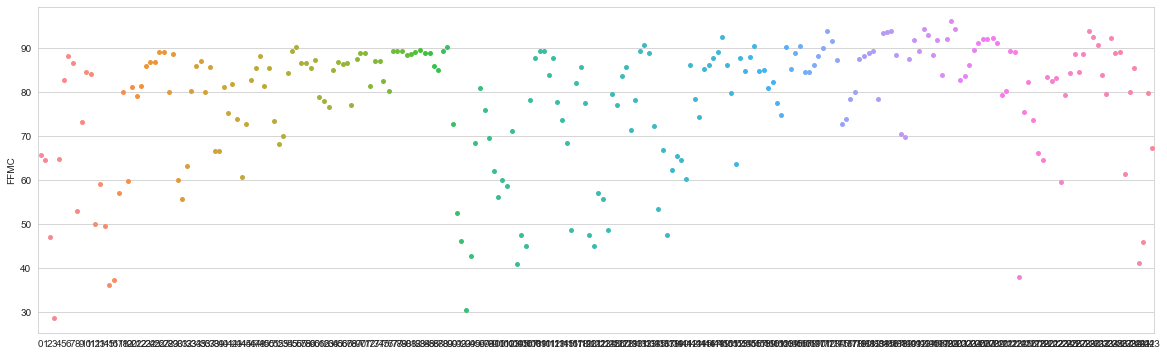

In [24]:
#Strip Plot
plt.figure(figsize=(20,6))
sns.stripplot(x=df.index,y=df['FFMC'])

# 2) Uni-variate summary plots :

These plots give a more concise description of the location, dispersion, and distribution of a variable than an enumerative plot. It is not feasible to retrieve every individual data value in a summary plot, but it helps in efficiently representing the whole data from which better conclusions can be made on the entire data set.

## Histogram: 
Histograms are similar to bar charts which display the counts or relative frequencies of values falling in different class intervals or ranges. A histogram displays the shape and spread of continuous sample data. It also helps us understand the skewness and kurtosis of the distribution of the data.

Text(0.5, 1.0, 'Histogram plot of Sales')

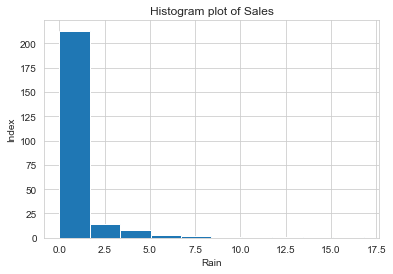

In [25]:
#Histogram / Distplot (in Seaborn)
plt.figure(figsize=(6,4))
plt.hist(df['Rain'])
sns.set_style('whitegrid')
plt.xlabel('Rain')
plt.ylabel('Index')
plt.title('Histogram plot of Sales')

## Density Plot: 
A density plot is like a smoother version of a histogram. Generally, the kernel density estimate is used in density plots to show the probability density function of the variable. A continuous curve, which is the kernel is drawn to generate a smooth density estimation for the whole data.

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

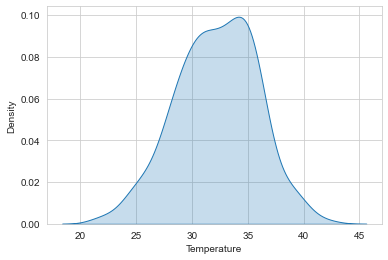

In [26]:
#Density plot/kde plot(in seaborn)
sns.kdeplot(df['Temperature'],shade=True)

## Box Plot: 
A box-plot is a very useful and standardized way of displaying the distribution of data based on a five-number summary (minimum, first quartile, second quartile(median), third quartile, maximum). It helps in understanding these parameters of the distribution of data and is extremely helpful in detecting outliers.

C:\Users\Thanmai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

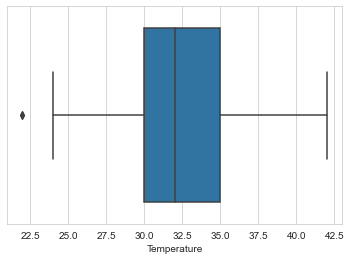

In [27]:
#Box Plot
sns.boxplot(df['Temperature'])

# Bivariate Analysis
Bivariate analysis is an analysis of two variables to determine the relationships between them. They are often reported in quality of life research. It is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (it is often denoted as X, Y), for the purpose of determining the empirical relationship between them.

Types of Bivariate Analysis
Some of the common types of bivariate analysis include:

## Scatter Plots: 
Scatterplot provides you with a visual idea of the pattern that your variables follow.

## Regression Analysis: 
Regression analysis is a catch-all term for a wide variety of tools that can be used to determine how your data points might be related. The points in the image above seem like they could follow an exponential curve (as opposed to a straight line). Regression analysis not only provides you with an equation for that curve or line but also gives you the correlation coefficient.

## Correlation Coefficients: 
Calculation of values for correlation coefficients are performed using a computer, although here, you can find the steps to find the correlation coefficient by hand. This coefficient acknowledges you if the variables are related. Basically, by ‘0’ means they aren't correlated (i.e. related in some way), while a ‘1’ (either positive or negative) means that the variables are perfectly correlated (i.e. they are perfectly in sync with each other).

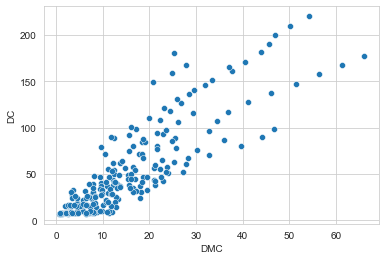

In [28]:
#Plotting correlation between DMC & DC features
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['DMC'],y=df['DC'],data=df)
df['DMC'].corr(df['DC'])
#print("Correlation value is",df['DMC'].df['DC'])
plt.show()

# Multivariate Analysis
In data analytics, we look at different variables (or factors) and how they might impact certain situations or outcomes. For example, in marketing, you might look at how the variable “money spent on advertising” impacts the variable “number of sales.” In the healthcare sector, you might want to explore whether there’s a correlation between “weekly hours of exercise” and “cholesterol level.” This helps us to understand why certain outcomes occur, which in turn allows us to make informed predictions and decisions for the future.

<AxesSubplot:>

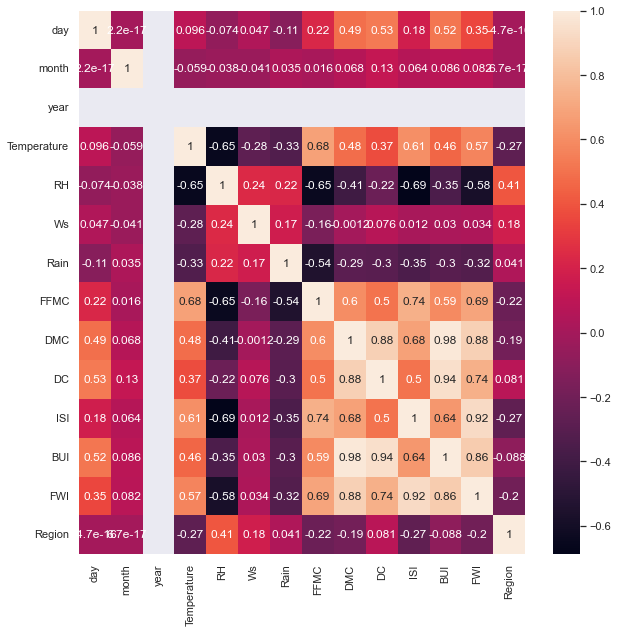

In [29]:
sns.set(rc = {'figure.figsize' : (10,10)})
sns.heatmap(df.corr(), annot = True)

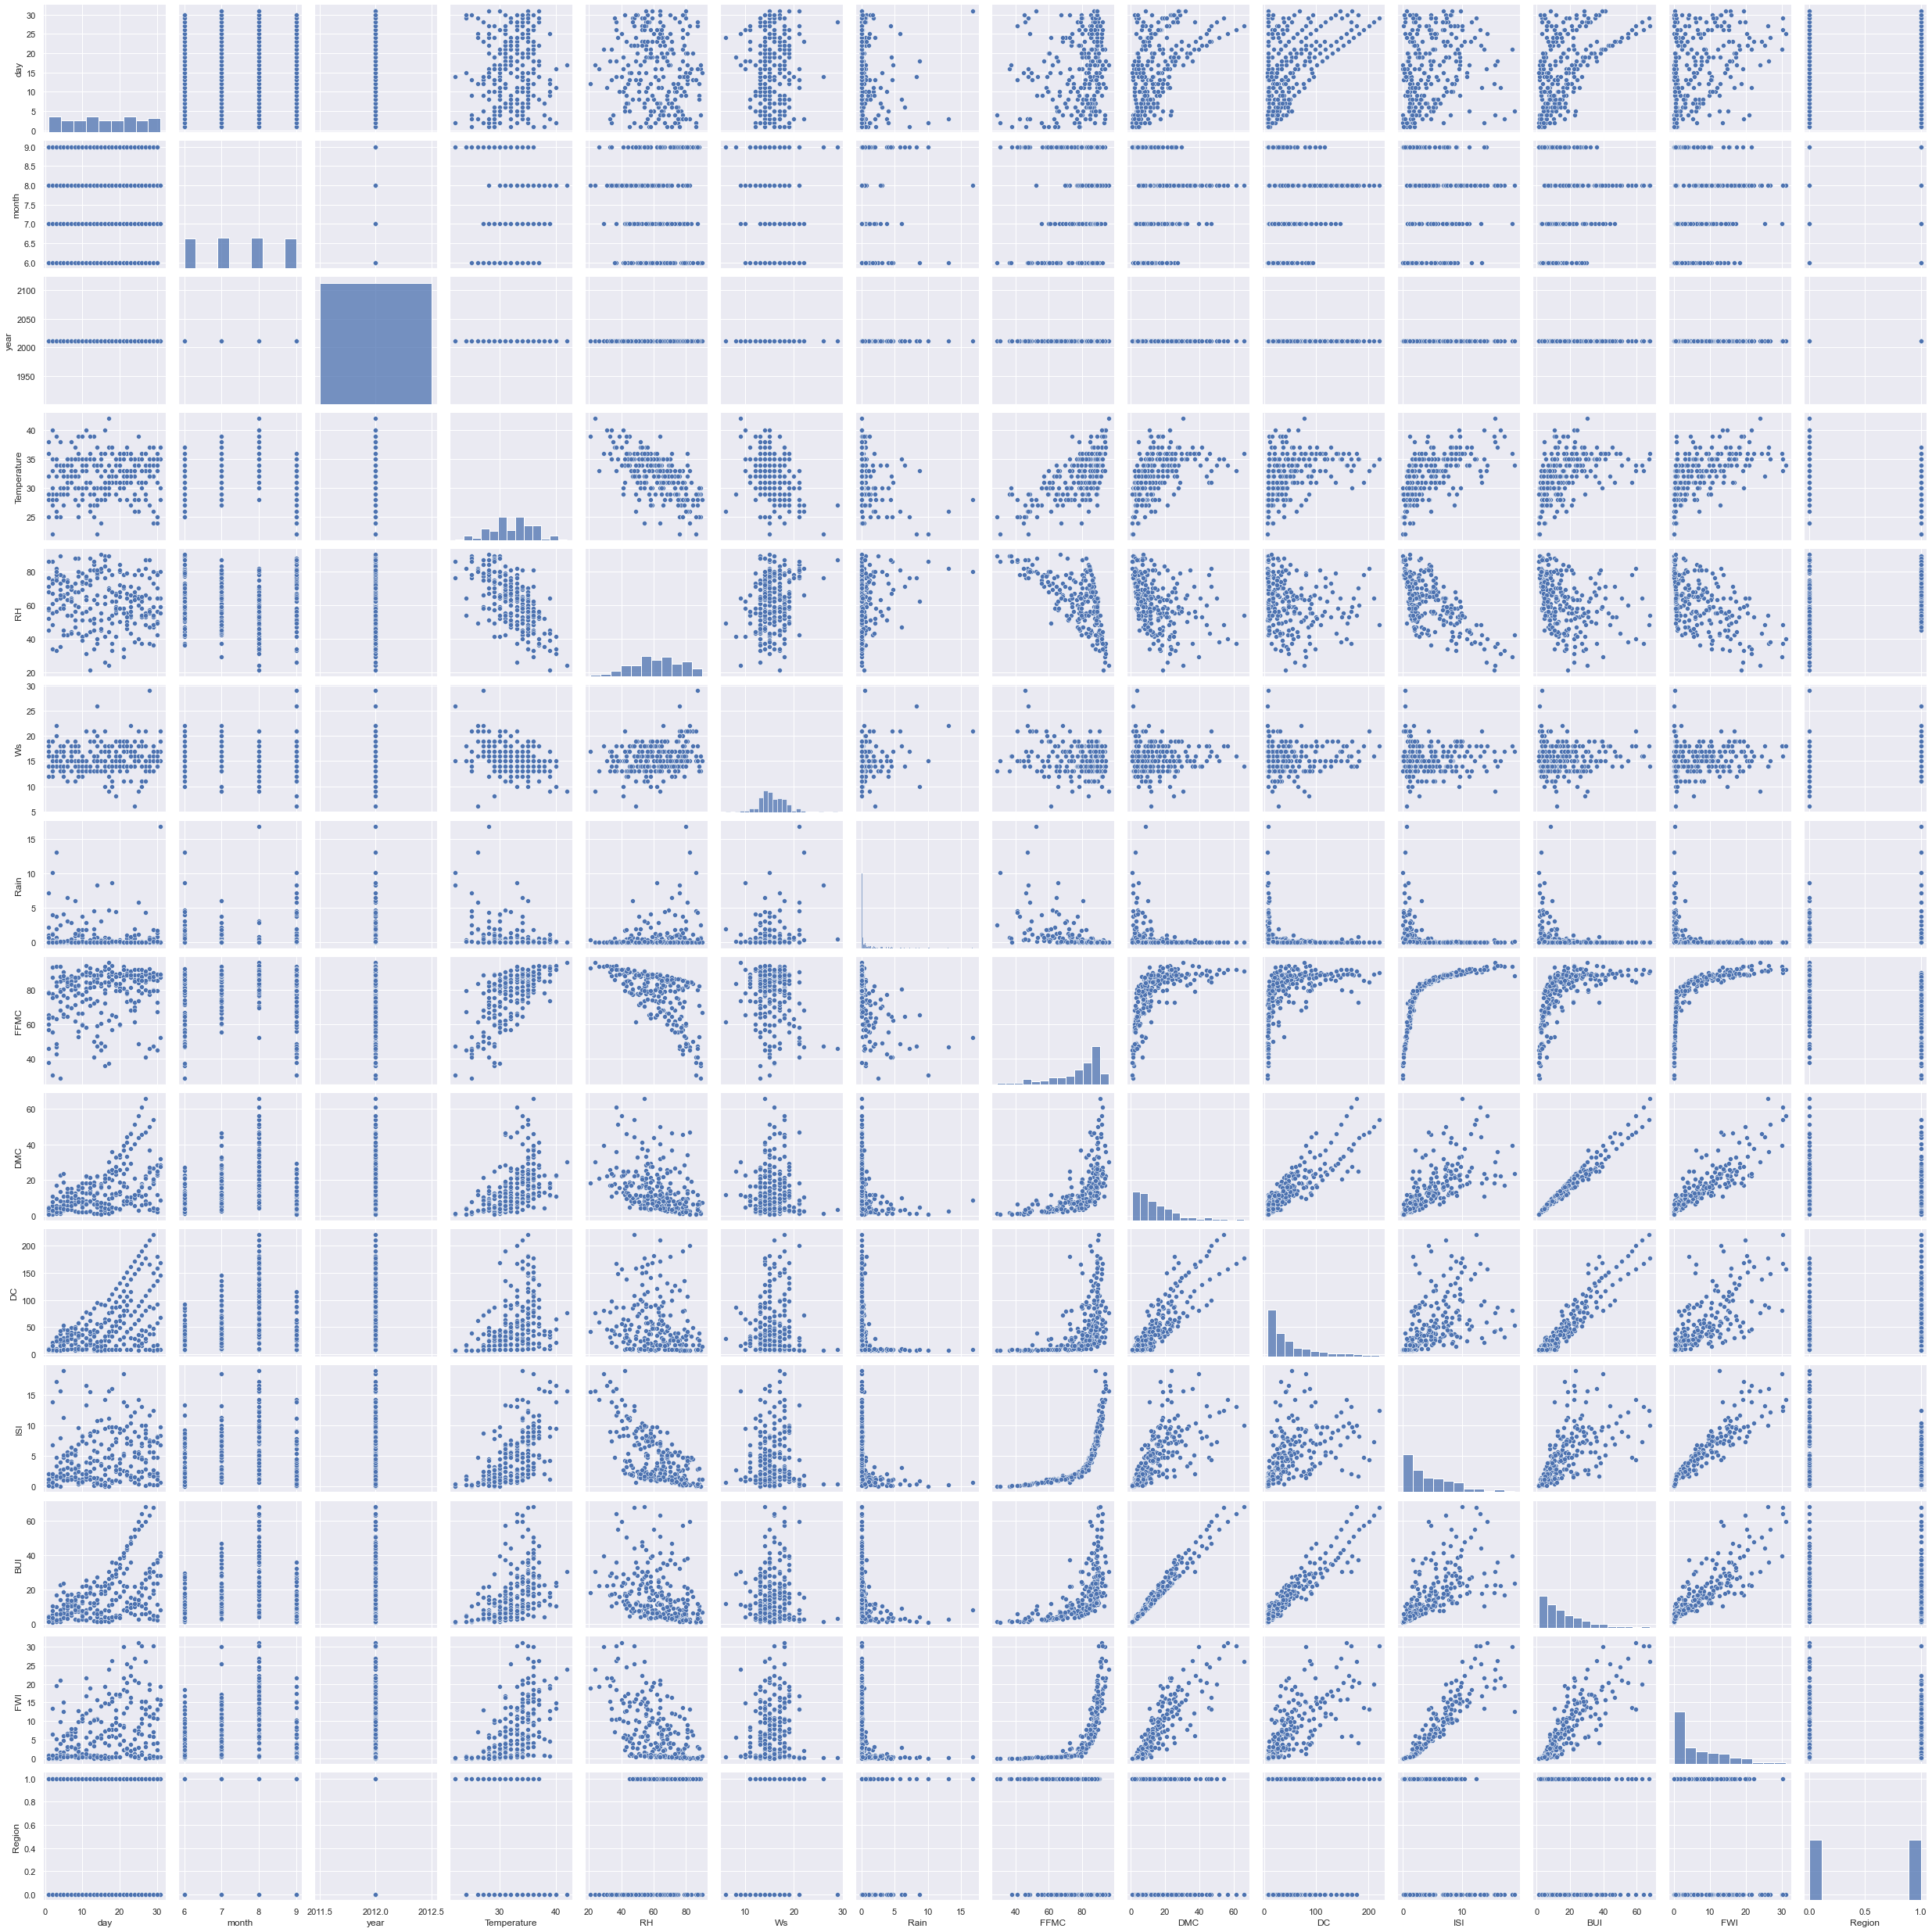

In [30]:
sns.pairplot(df)

In [31]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

# Train Test Splitting

In [41]:
#encoding the data values using one hot encoding techiniue
df = pd.get_dummies(df,columns=['Classes'],drop_first=True)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_not fire
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,1


In [101]:
x_col = ['day', 'month','RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'Classes_not fire']
print(x_col)
y_col = ['Temperature']
print(y_col)

['day', 'month', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'Classes_not fire']
['Temperature']


In [102]:
X

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_not fire
0,1,6,2012,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,1
1,2,6,2012,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,1
2,3,6,2012,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,1
3,4,6,2012,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,1
4,5,6,2012,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,0
240,27,9,2012,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
241,28,9,2012,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
242,29,9,2012,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [103]:
y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 244, dtype: int32

In [104]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [105]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

163
163
81
81


In [106]:
# standarding the featues using Standard Scaler feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 1.0627621 ,  1.33562856,  0.        , ..., -0.86597829,
        -0.98176139,  1.06992376],
       [ 0.34495731,  0.44338489,  0.        , ...,  1.21371864,
         1.01857744, -0.93464604],
       [ 1.30203036, -1.34110244,  0.        , ...,  0.48516239,
         1.01857744, -0.93464604],
       ...,
       [-0.01394508,  1.33562856,  0.        , ...,  0.37919057,
        -0.98176139, -0.93464604],
       [-1.32992053, -1.34110244,  0.        , ..., -0.78649943,
        -0.98176139,  1.06992376],
       [-0.61211574, -1.34110244,  0.        , ..., -0.7997459 ,
         1.01857744,  1.06992376]])

# Linear Regression

In [107]:
# Model Training
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [108]:
regression.fit(X_train, y_train)#we are applying formula not changing data

LinearRegression()

In [109]:
#print the coefficients and the intercept
print(regression.coef_)
print(regression.intercept_)

[-1.54702871e-01 -3.07343341e-01  1.11022302e-16 -1.21203430e+00
 -5.80039874e-01 -2.23702352e-01  1.00381362e+00 -1.54419211e-01
  1.07134593e+00 -4.99392889e-02 -5.57853940e-01  3.28177590e-01
 -2.83598389e-01 -1.44181128e-01]
32.17791411042945


In [110]:
#prediction 
reg_pred = regression.predict(X_test)
reg_pred

array([31.89343014, 33.45850542, 33.16243941, 31.43710015, 32.88168669,
       34.8669297 , 33.8942223 , 34.37067802, 32.02984529, 33.18602102,
       33.67809413, 27.06745096, 35.36651176, 29.35877503, 32.22558526,
       32.33418792, 34.92608865, 27.22763463, 36.08533571, 34.43514539,
       33.24253375, 34.61673357, 33.80293181, 33.19394862, 35.82598142,
       29.34648278, 32.44331073, 31.89524442, 26.73630937, 32.35108551,
       25.16025926, 27.05285188, 34.39426024, 32.12446729, 33.19996306,
       30.56626556, 29.13749234, 32.53449518, 27.1575937 , 35.57830841,
       32.73296049, 34.0292092 , 34.27847556, 31.43501508, 36.56354671,
       34.00949109, 23.78638114, 35.26468661, 34.10593886, 29.11023866,
       31.49805083, 32.48570204, 35.69147436, 32.62538514, 29.72811213,
       29.82534175, 32.71969495, 36.30264752, 31.17939635, 33.28070153,
       32.45840843, 32.88885861, 31.4095334 , 24.91571028, 31.27452007,
       36.23243437, 29.52256918, 29.80846347, 34.99178321, 34.04

# Assumptions

Text(0, 0.5, 'Test Prediscted Data')

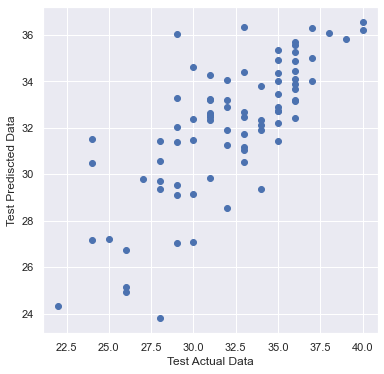

In [111]:
#The relationship between actual and predicted data should be linear
sns.set(rc = {'figure.figsize' : (6,6)})
plt.scatter(y_test,reg_pred)
plt.xlabel('Test Actual Data')
plt.ylabel('Test Prediscted Data')

We can see that the relationship between actual and predicted values is linear.

In [112]:
#Calculating residual
residuals = y_test - reg_pred
residuals

162    2.106570
60     1.541495
61     2.837561
63     3.562900
69     2.118313
         ...   
169    0.315625
232   -7.038652
144    1.256798
208   -3.355706
105   -2.318884
Name: Temperature, Length: 81, dtype: float64

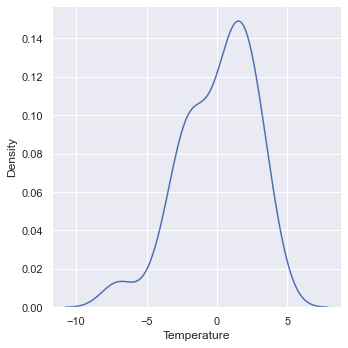

In [113]:
# distribution of residual are approxi normal fashion 
sns.displot(residuals,kind='kde')    #little sked due to outliers

we can see that the distribution of data is little leftsked data distribued we can overcome this by hyperparameter tunning.

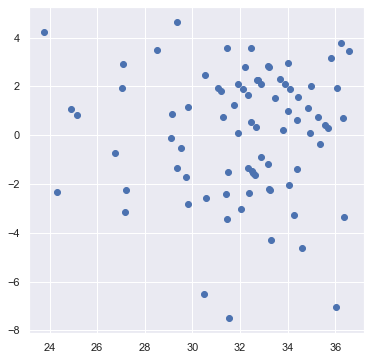

In [114]:
# The distribution should be uniform (Homoscedasticity)
plt.scatter(reg_pred, residuals)

Data b/w the reg_prd and residual are in random in nature

# performance Metrics

In [115]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

6.731161507077733
2.1389715593305056
2.594448208594215


In [116]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.5548877154554919


In [117]:
## Adjusted R2 need to write
# need to perform
adjR = 1 - ( 1-score ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print(adjR)

0.5276756107235132


In [118]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1)

In [119]:
ridge_reg.fit(X_train,y_train)

Ridge(alpha=0.1)

In [120]:
print(ridge_reg.coef_)
print(ridge_reg.intercept_)

[-0.15424289 -0.30624371  0.         -1.21186781 -0.579886   -0.22436748
  1.00021506 -0.18426142  1.04758895 -0.0389993  -0.49665107  0.31086336
 -0.28318329 -0.14430298]
32.17791411042945


In [121]:
rid_pred =ridge_reg.predict(X_test)
rid_pred

array([31.8934962 , 33.45884012, 33.16084694, 31.43705101, 32.88045238,
       34.86680184, 33.88771381, 34.3638284 , 32.0291461 , 33.18348471,
       33.67530269, 27.06932887, 35.36341495, 29.35606797, 32.22640251,
       32.33303055, 34.92181234, 27.2322376 , 36.08768485, 34.43499638,
       33.24021406, 34.60656969, 33.80061046, 33.19264072, 35.8291675 ,
       29.34728604, 32.43605834, 31.89983245, 26.74056853, 32.35453529,
       25.16254664, 27.05531756, 34.3902838 , 32.12501804, 33.19783753,
       30.56496392, 29.13489492, 32.53333239, 27.16037097, 35.57426371,
       32.73024019, 34.02708897, 34.28064089, 31.43274654, 36.55996311,
       34.00821491, 23.79084181, 35.265936  , 34.10506228, 29.10918315,
       31.49585056, 32.48488557, 35.69094053, 32.62233747, 29.73049296,
       29.82265016, 32.727771  , 36.30304316, 31.18517647, 33.28042796,
       32.45847576, 32.88998187, 31.40720265, 24.91099741, 31.27702408,
       36.2338036 , 29.52248208, 29.80872421, 34.99406499, 34.04

Text(0, 0.5, 'Test Predict Data')

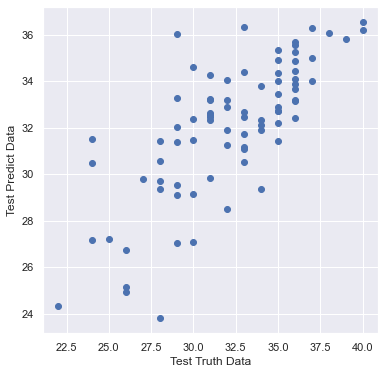

In [122]:
# relation between real and pred data 
plt.scatter(y_test,rid_pred) # if you get linear manner it is good linear model
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predict Data')

In [123]:
## calculating residual
residuals = y_test-rid_pred
residuals

162    2.106504
60     1.541160
61     2.839153
63     3.562949
69     2.119548
         ...   
169    0.313787
232   -7.045728
144    1.255479
208   -3.354022
105   -2.318867
Name: Temperature, Length: 81, dtype: float64

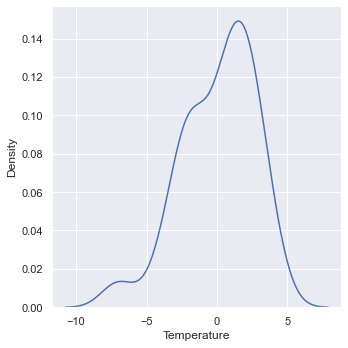

In [124]:
# distribution of residual are approxi normal fashion 
sns.displot(residuals,kind='kde')    #little left-sked due to outliers

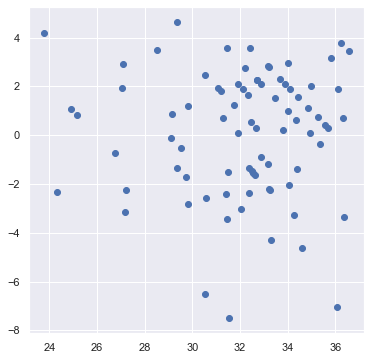

In [125]:
# The distribution should be uniform (Homoscedasticity)
plt.scatter(rid_pred,residuals)

In [126]:
print(mean_squared_error(y_test,rid_pred))
print(mean_absolute_error(y_test,rid_pred))
print(np.sqrt(mean_squared_error(y_test,rid_pred)))

6.730570507988153
2.1387459536380713
2.594334309218485


In [127]:
score = r2_score(y_test,rid_pred)
print(score)

0.5549267965196811


In [128]:
adjR = 1 - ( 1-score ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print(adjR)

0.5277170810230678


# Lasso Regression

In [129]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)

In [130]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [131]:
print(lasso.coef_)
print(lasso.intercept_)

[-0.         -0.13083314  0.         -1.19926931 -0.43044757 -0.11815794
  1.07190386  0.          0.37061052  0.02636961  0.          0.01903014
 -0.10390872 -0.1057482 ]
32.17791411042945


In [132]:
ls_prd = lasso.predict(X_test)
ls_prd

array([32.02526755, 33.34480955, 33.26003391, 31.64167363, 32.9368546 ,
       34.58886804, 33.70524233, 33.73480417, 32.09547487, 33.0047531 ,
       33.78337989, 27.85648846, 35.25038677, 29.71177096, 32.69491101,
       32.29687911, 34.15632818, 27.90259846, 35.80487346, 34.45974776,
       32.9008972 , 33.86215751, 33.8159162 , 33.15047181, 35.56691989,
       29.12035907, 32.29010472, 32.82209479, 27.57712451, 32.23325154,
       26.48924395, 26.75655737, 34.03641512, 32.39670811, 33.07641734,
       30.61891365, 29.10044563, 32.46085155, 27.49773337, 35.19092581,
       32.57578321, 34.1310085 , 34.18897878, 31.23736497, 36.09094216,
       33.91915165, 26.11619991, 34.99283468, 34.03924056, 29.3562621 ,
       31.41813935, 32.52947928, 35.54319282, 32.34005462, 30.3299199 ,
       30.06167567, 32.8307416 , 36.1412909 , 31.52129085, 33.42869921,
       32.44184598, 32.73653619, 31.19470952, 25.91478652, 31.58563549,
       35.80818946, 29.86108072, 30.12512377, 34.81999111, 33.75

Text(0, 0.5, 'Test Predict Data')

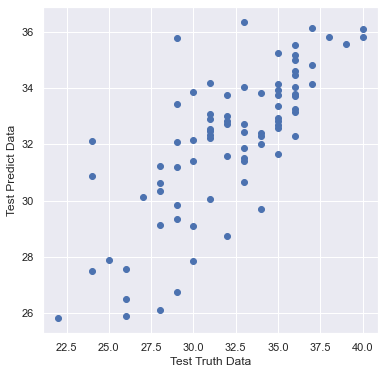

In [133]:
# relation between real and pred data 
plt.scatter(y_test,ls_prd) # if you get linear manner it is good linear model
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predict Data')

In [134]:
## calculating residuals
residuals = y_test-ls_prd
residuals

162    1.974732
60     1.655190
61     2.739966
63     3.358326
69     2.063145
         ...   
169    0.290330
232   -6.790737
144    1.141112
208   -3.346922
105   -3.814113
Name: Temperature, Length: 81, dtype: float64

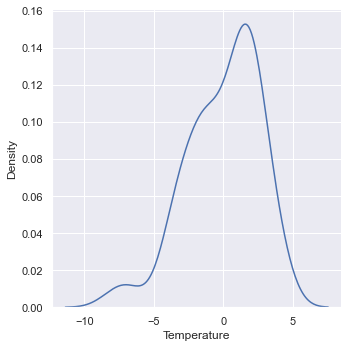

In [135]:
# distribution of residual are approxi normal fashion 
sns.displot(residuals,kind='kde') 

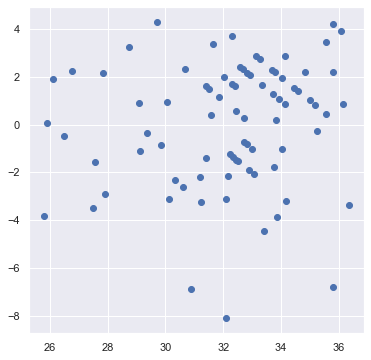

In [136]:
# The distribution should be uniform (Homoscedasticity)
plt.scatter(ls_prd,residuals)

In [137]:
#performance Metrics
print(mean_squared_error(y_test,ls_prd))
print(mean_absolute_error(y_test,ls_prd))
print(np.sqrt(mean_squared_error(y_test,ls_prd)))

6.745755700162749
2.1398428556321805
2.5972592670279857


In [138]:
score = r2_score(y_test,ls_prd)
print(score)

0.5539226435851579


In [139]:
adjR = 1 - ( 1-score ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print(adjR)

0.5266515388261719


# Elastic Net

In [140]:
from sklearn.linear_model import ElasticNet
el_reg = ElasticNet(random_state=0)

In [141]:
el_reg.fit(X_train,y_train)

ElasticNet(random_state=0)

In [142]:
print(el_reg.coef_)
print(el_reg.intercept_)

[ 0.         -0.          0.         -0.68644564 -0.10781129 -0.01366814
  0.67087773  0.06895291  0.          0.19946905  0.03908996  0.14549461
 -0.         -0.1081778 ]
32.17791411042945


In [143]:
el_prd = el_reg.predict(X_test)
el_prd

array([31.8659284 , 32.99980934, 32.61748317, 31.68640363, 32.97133107,
       33.99127101, 33.52848833, 32.70058551, 32.03261403, 32.73102985,
       33.40671458, 29.86476604, 34.23731503, 30.65217133, 32.75675926,
       32.28808467, 32.89332375, 29.43217613, 35.12277514, 33.93920094,
       32.44432598, 33.42168594, 33.54478947, 32.89474727, 35.1259888 ,
       29.95812513, 32.18623078, 32.46953345, 29.38105996, 32.08849583,
       29.16349431, 28.66243293, 33.27026445, 32.20567456, 32.70223675,
       31.2509238 , 30.00475117, 32.36817369, 29.20540962, 34.02296148,
       32.85515574, 33.57663149, 34.19266935, 31.64138001, 34.55218622,
       33.42794545, 29.34695893, 33.96772651, 33.44375187, 30.28336163,
       31.5064206 , 32.37874239, 34.67273523, 32.10287032, 31.43470396,
       30.85601515, 32.44873308, 34.84733754, 31.54349233, 33.48150748,
       32.17519927, 32.46567057, 31.1942968 , 28.93540971, 31.80171987,
       34.85089246, 30.74604222, 30.93384856, 33.88868711, 32.96

Text(0, 0.5, 'Test Predict Data')

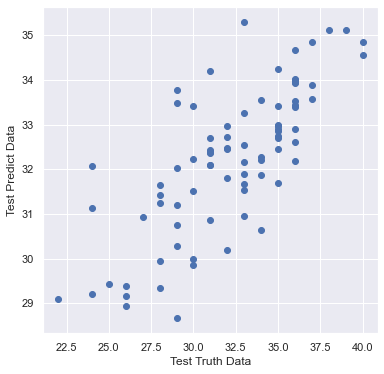

In [144]:
# Linear Relationship
plt.scatter(y_test,el_prd)
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predict Data')

In [145]:
## calculating residuals
residuals = y_test-el_prd
residuals

162    2.134072
60     2.000191
61     3.382517
63     3.313596
69     2.028669
         ...   
169    0.448604
232   -4.785012
144    1.318929
208   -2.300618
105   -7.102830
Name: Temperature, Length: 81, dtype: float64

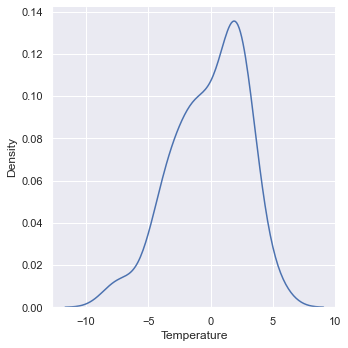

In [146]:
sns.displot(residuals,kind='kde')

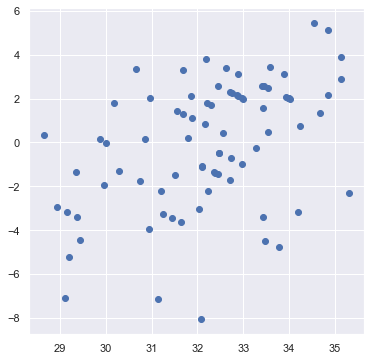

In [147]:
# Homoscedaticity
plt.scatter(el_prd,residuals)

In [148]:
#Performance Metrics
print(mean_squared_error(y_test,el_prd))
print(mean_absolute_error(y_test,el_prd))
print(np.sqrt(mean_squared_error(y_test,el_prd)))

score = r2_score(y_test,el_prd)
print(score)

adjR = 1 - ( 1-score ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print(adjR)

8.292252068870686
2.3928423520303443
2.879627071144923
0.45165730186195463
0.4181341674779693
